# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [86]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

import seaborn as sns
sns.set(style="darkgrid")

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [87]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [89]:
# Display a description of the dataset
display(data.describe().apply(np.int64))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440,440,440,440,440,440
mean,12000,5796,7951,3071,2881,1524
std,12647,7380,9503,4854,4767,2820
min,3,55,3,25,3,3
25%,3127,1533,2153,742,256,408
50%,8504,3627,4755,1526,816,965
75%,16933,7190,10655,3554,3922,1820
max,112151,73498,92780,60869,40827,47943


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [90]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [70,103,205]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16705,2037,3202,10643,116,1365
1,56082,3504,8906,18028,1480,2498
2,1107,11711,23596,955,9265,710


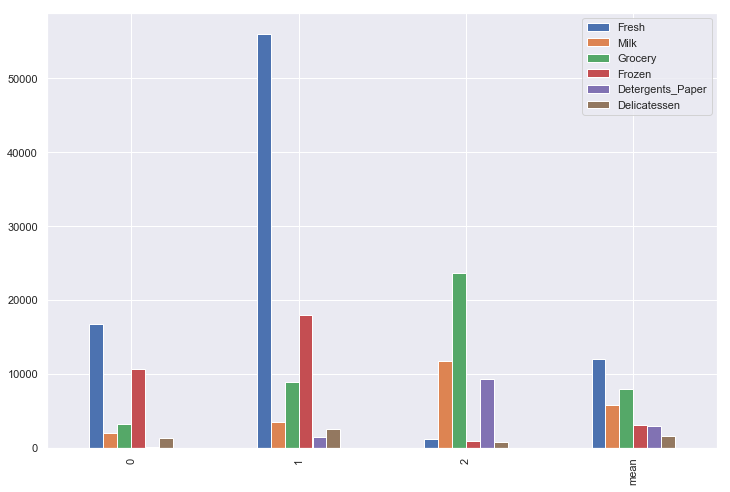

In [91]:
df1=data.describe().loc[['mean']].apply(np.int64)
df2=pd.concat([samples,df1])
df2.plot(kind='bar',figsize=(12,8));

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** 
If we see the mean statistics of the given wholesale data **Fresh** item has the highest spending and lowest spending on **Delicatessen**. Knowing this fact, I can guess in which category the chosen samples might belongs to:
* *Sample 1(index=70): We can see highest spending amount for this customer is on **Fresh** item and second highest spending on **Frozen** item.So, it seems this customer belongs to **cafe** category.*
* *Sample 2(index=103): We can see highest spending amount for this customer is on **Fresh** item and second highest spending on **Frozen** item.So, it seems this customer belongs to **cafe** category.*
* *Sample 3(index=205): We can see highest spending amount for this customer is on **Grocery** item and second highest spending on **Detergents_paper** item.So, it seems this customer belongs to **wholesale retailer** category.*

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [92]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [93]:
from sklearn.tree import DecisionTreeClassifier
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
for col in data.columns:
    new_data = data.drop(col,axis=1)
    target=data[col]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeClassifier().fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.predict(X_test)
    print("R Squared Score of {} is : {}".format(col,r2_score(y_test,score)))

R Squared Score of Fresh is : -0.9174092113796963
R Squared Score of Milk is : 0.4013144835506697
R Squared Score of Grocery is : -0.34243505453550216
R Squared Score of Frozen is : -0.26283380726868844
R Squared Score of Detergents_Paper is : -1.5981526615594945
R Squared Score of Delicatessen is : -0.8530825326553491


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* **Selected Feature: Frozen**
  **Prediction Score: -0.135**
  **YES**
* **Selected Feature: Fresh**
  **Prediction Score: -0.955**
  **YES**
* **Selected Feature: Milk**
  **Prediction Score:  0.277**
  **NO**
* **Selected Feature: Grocery**
  **Prediction Score: -0.452**
  **YES**
* **Selected Feature: Detergents_Paper**
  **Prediction Score: -0.289**
  **YES**
* **Selected Feature: Delicatessen**
  **Prediction Score: -12.01**
  **YES**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\ProgramData\Anaconda3\envs\ml_py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


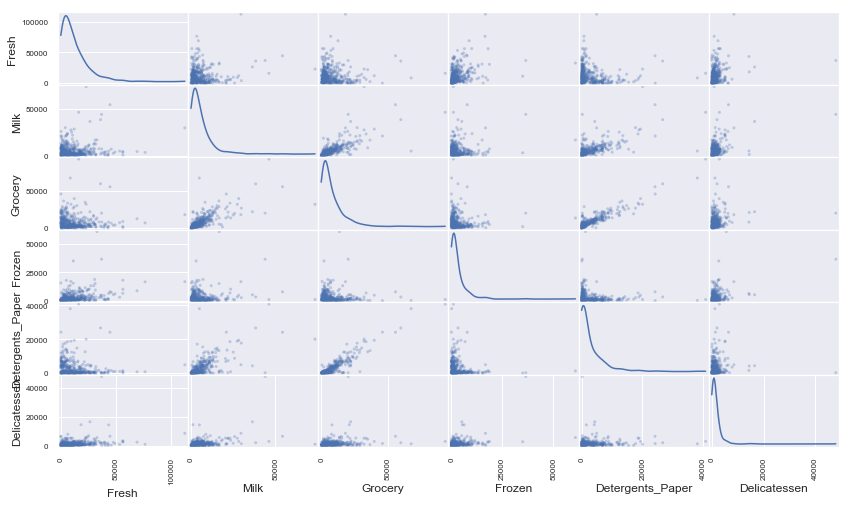

In [94]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to seperate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

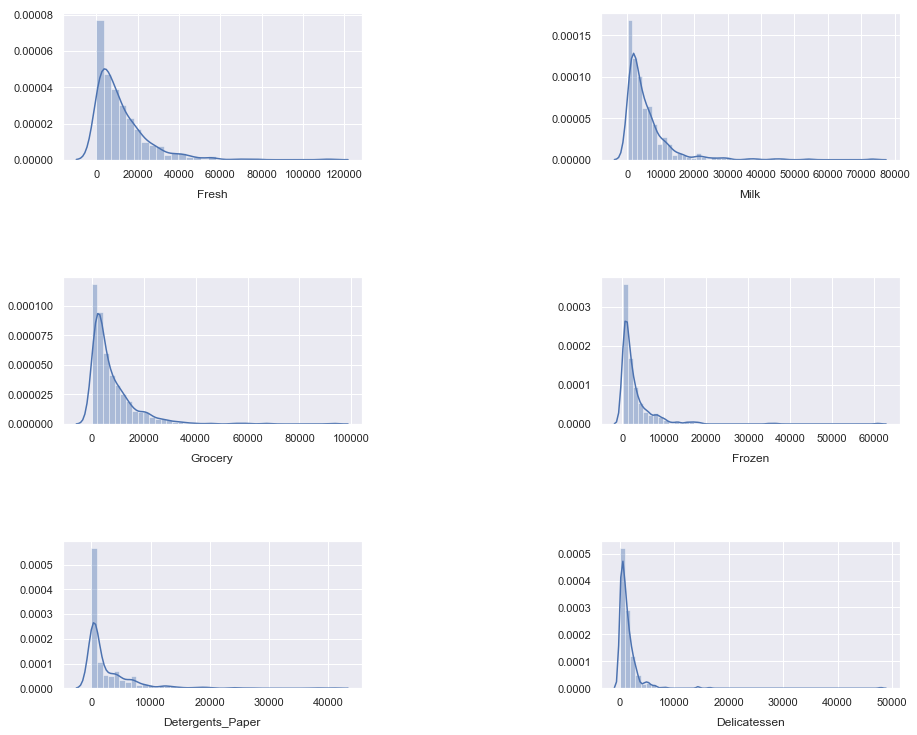

In [95]:
#Using histogram to have a look on the distribution
m=len(data.columns)
# print(m,m//3)
plt.figure(figsize=(15,15))
for i,col in enumerate(data.columns):
    plt.subplot((m//2)+1,2,i+1)
#     data[col].hist()
    sns.distplot(data[col])
    plt.subplots_adjust(bottom=0.01,wspace = 0.8,hspace = 0.8)
    plt.xlabel(col,labelpad=10)
#     plt.title(col,pad=10)
    plt.tight_layout

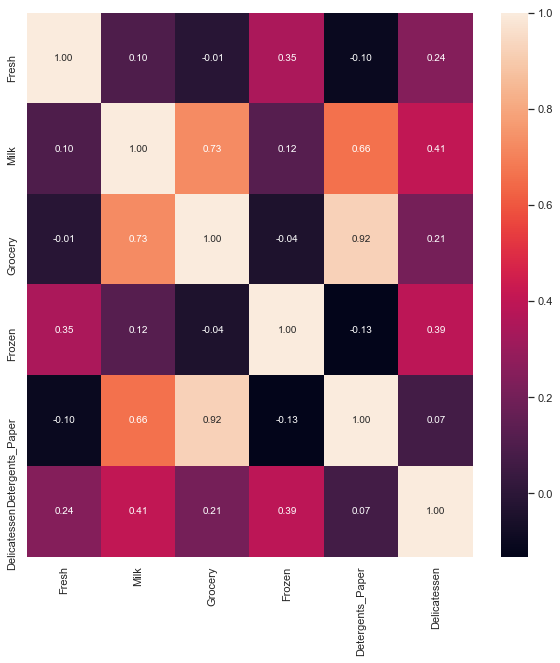

In [96]:
import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(),annot=True,fmt=".2f");

**Answer:**

* **Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to seperate out some of the plots individually to further accentuate your point, you may do so as well.**

*After reviewing scatter plots and individual histograms of the features in out dataset, I found that all the six features i.e. 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' and 'Delicatessen' have right-skewed distribution. As the distribution is highly skewed there are chances of outliers, a possible reason for the skewness. Also, large no of data points are near 0 in case of all the six features.*

* **Are there any pairs of features which exhibit some degree of correlation?**

*Yes, there are some correlations I observed in the drawn heatmap above. There is a strong correlation between **'Grocery' and 'Detergents_Paper'**. Some other pairs are like:**'Grocery' and 'Milk'**, **'Milk' and 'Detergents_Paper'**.* 

* **Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?**

*Yes, This reinforce the suspicions about the relevance of the feature I attempted earlier. In the regressor analysis I found that there was high score for 'Milk' means 'Milk' having correlation with other feature in the data hence less relevance feature(in other words, if I remove 'Milk' from the relevance feature then there will be no effect as same effect can be produced by others).*

* **How is the data for those features distributed?**

*By seeing the above histogram plots, I can say the distribution of given features are not normally distributed rather it is right skewed one.* 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\ProgramData\Anaconda3\envs\ml_py3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


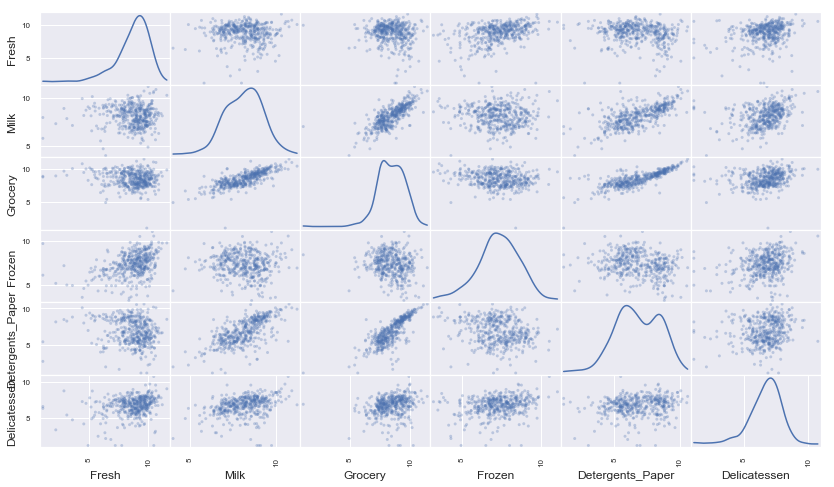

In [97]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

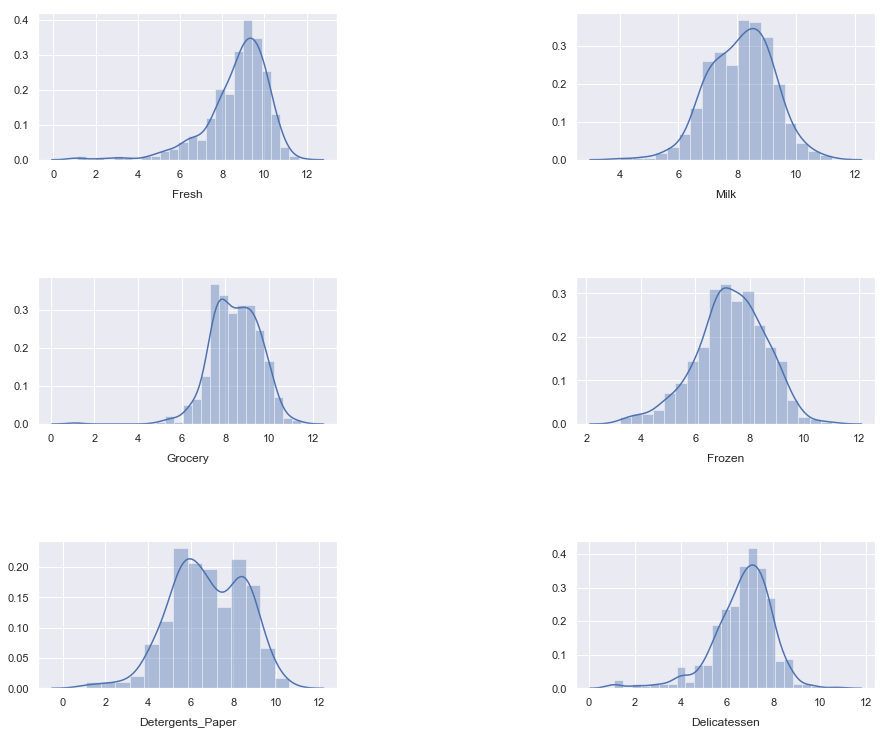

In [98]:
#Using histogram to have a look on the distribution
m=len(data.columns)
# print(m,m//3)
plt.figure(figsize=(15,15))
for i,col in enumerate(data.columns):
    plt.subplot((m//2)+1,2,i+1)
#     data[col].hist()
    sns.distplot(log_data[col])
    plt.subplots_adjust(bottom=0.01,wspace = 0.8,hspace = 0.8)
    plt.xlabel(col,labelpad=10)
#     plt.title(col,pad=10)
    plt.tight_layout

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [99]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.723463,7.619233,8.071531,9.272658,4.753590,7.218910
1,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246
2,7.009409,9.368284,10.068832,6.861711,9.133999,6.565265


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [100]:
log_data.keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [101]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = Q3-Q1
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
53,6.196444,9.256556,9.352881,6.612041,8.632484,5.411646
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
159,5.872118,8.949495,9.594378,5.986452,8.996776,5.713733


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
275,6.522093,7.383989,5.407172,6.759255,4.564348,5.937536
333,9.055439,8.513185,11.116886,4.875197,10.548022,7.102499


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,6.927558,9.084324,9.402695,4.897840,8.413609,6.984716
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
59,8.722091,8.586719,8.992184,4.859812,8.033983,7.379632
60,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
93,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
103,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246
106,7.282074,8.754161,9.278373,4.890349,8.829080,7.512618


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
402,10.186371,8.466531,8.535230,5.393628,2.302585,5.828946


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
25,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
42,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
43,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
44,9.176784,8.857515,9.256365,6.293419,8.437717,4.174387
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
71,9.814164,7.143618,9.954276,8.589142,8.336390,9.579971
87,10.675099,8.522181,9.001716,8.750208,7.364547,9.571575
88,8.970051,6.295266,8.304495,9.183483,5.105945,3.828641
97,5.998937,5.537334,6.413459,6.651572,3.988984,4.143135


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* **Are there any data points considered outliers for more than one feature based on the definition above?**

*Yes, There are data points considered outliers for features like: Fresh, Milk, Grocery, Frozen, Detergents_paper and Delicatessen*

* **Should these data points be removed from the dataset?**

*Yes, because k-means algorithm is sensitive to outliers and this may impact our analysis.*

* **If any data points were added to the outliers list to be removed, explain why?**

*No, datapoints are added to the outliers list.*

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

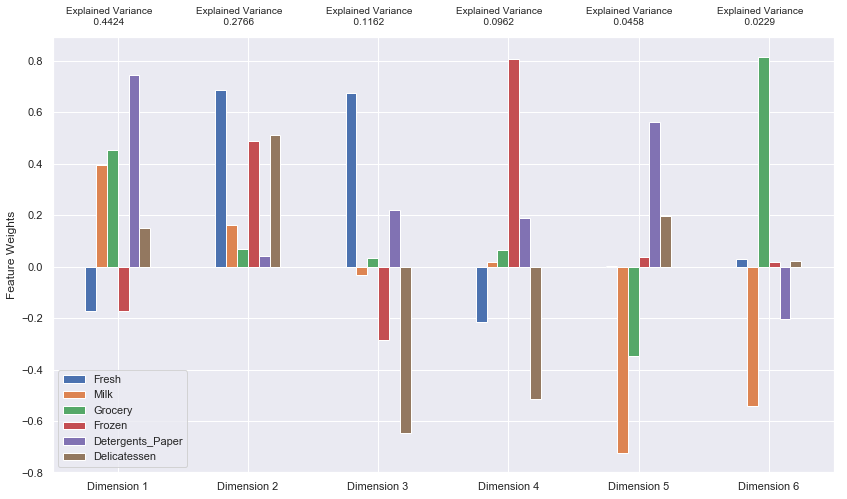

In [102]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* **How much variance in the data is explained* in total *by the first and second principal component?**

*A total variance = 0.7190 in the data is explained by the first and second principal component.*

* **How much variance in the data is explained by the first four principal components?**

*A total variance = 0.9314  in the data is explained by the first four principal components.*

* **Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.**

*Followings are the discussion about the PCA dimensions:*
* **Dimension 1**: Total explained variance is 0.4424. **Detergent_Paper** is the feature best explained by dimension 1.
* **Dimension 2**: Total explained variance is 0.2766. **Fresh** is the feature best explained by dimension 2.
* **Dimension 3**: Total explained variance is 0.1162. **Fresh and Delicatessen** are the feature best explained by dimension 3.
* **Dimension 4**: Total explained variance is 0.0962. **Frozen** is the feature best explained by dimension 4.
* **Dimension 5**: Total explained variance is 0.0458. **Milk** is the feature best explained by dimension 5.
* **Dimension 6**: Total explained variance is 0.0229. **Grocery** is the feature best explained by dimension 6.

*Total explained variance of first four dimensions is 0.9314.The first four dimension best represents **Fresh, Milk, Grocery, Frozen and Detergents_paper**.* 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [103]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3102,1.7316,-0.6885,0.6724,-0.4740,0.4592
1,0.0559,3.3922,0.1582,1.0873,0.3516,0.5402
2,3.3418,-1.0307,-0.4460,0.6401,-0.1806,0.1118


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [104]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# print("shape:",reduced_data.shape)
# print(reduced_data)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# print(reduced_data)
# print(pca_samples)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [105]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.3102,1.7316
1,0.0559,3.3922
2,3.3418,-1.0307


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

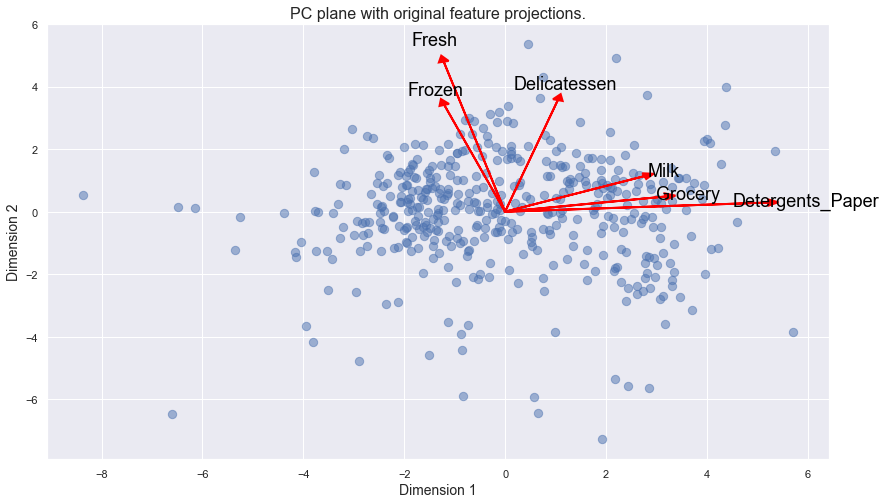

In [106]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **What are the advantages to using a K-Means clustering algorithm?**

*Followings are advantages of K-Means clustering algorithm:*  [Reference](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages)

* Relatively simpler algorithm to implement.
* Easily scalable to large datasets.
* K-Means clustering algorithm produces tighter cluster.
* Generalises cluster to different shapes and sizes.
* Random choice of cluster center may cause different result in several run of the algorithm.

* **What are the advantages to using a Gaussian Mixture Model clustering algorithm?**

*Followings are advantages of K-Means clustering algorithm:*
* Extremely useful result for the real world data.
* Fastest algorithm for learning mixture models.

* **Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?**

*Even though the wholesale customer data we are analysis is not large, I would use K-means algorithm in this case because of it produces tighter cluster, generalise cluster to different shapes and sizes and lastly its easy to implement.*

 ### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [107]:
#for n in range(2,10):
from sklearn.cluster import KMeans
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

from sklearn.metrics import silhouette_score
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

#print("Silhoutte Score for Clusters of {} is {:.2f}".format(n,score))
# print(preds)    
# print(sample_preds)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* **Report the silhouette score for several cluster numbers you tried.**

*Following are silhouette score for several cluster numbers that I tried:*

* Silhoutte Score for Clusters of 2 is 0.42
* Silhoutte Score for Clusters of 3 is 0.39
* Silhoutte Score for Clusters of 4 is 0.33
* Silhoutte Score for Clusters of 5 is 0.35
* Silhoutte Score for Clusters of 6 is 0.36
* Silhoutte Score for Clusters of 7 is 0.35
* Silhoutte Score for Clusters of 8 is 0.36
* Silhoutte Score for Clusters of 9 is 0.35

* **Of these, which number of clusters has the best silhouette score?**

*Number of clusters=2 has the best silhouette score, which is equal to 0.42.*

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

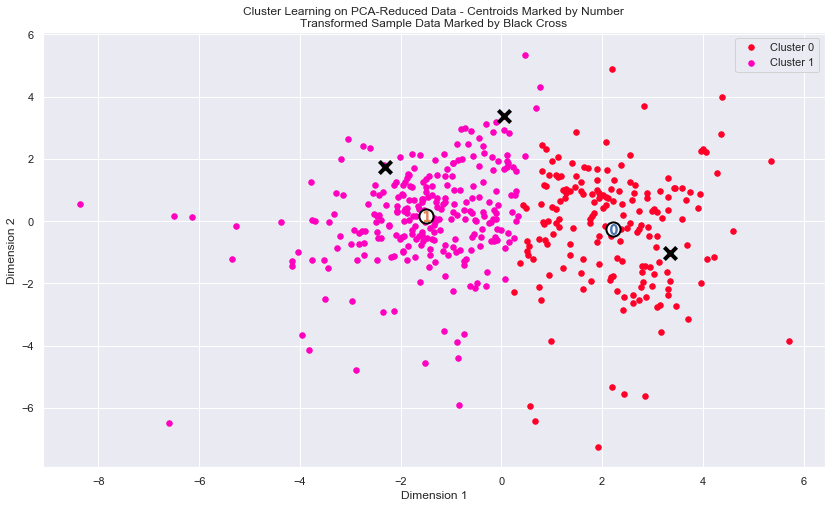

In [108]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [109]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3570.0,7749.0,12463.0,900.0,4567.0,966.0
Segment 1,8994.0,1909.0,2366.0,2081.0,290.0,681.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

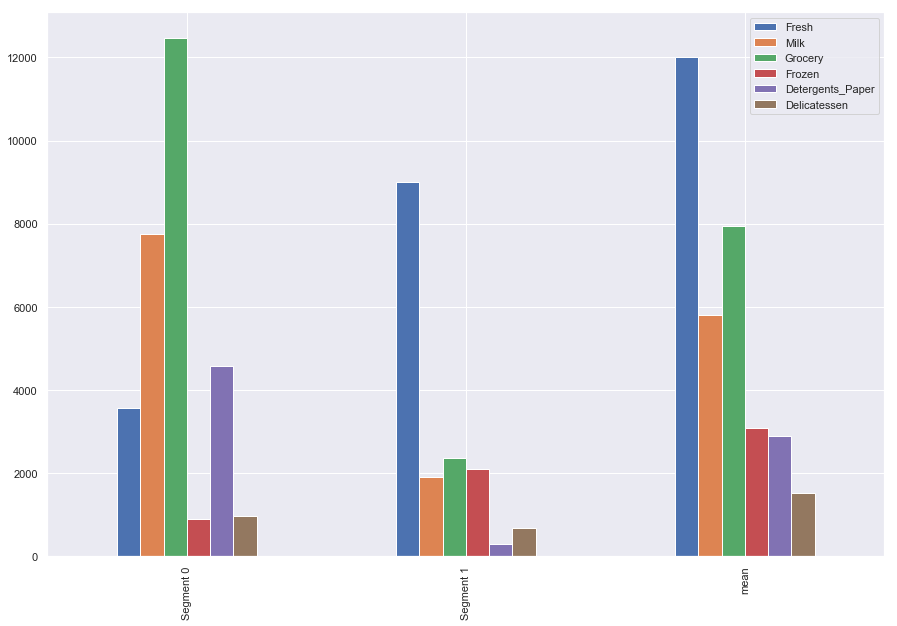

In [110]:
pd.concat([true_centers,data.describe().loc[['mean']].apply(np.int64)]).plot(kind='bar',figsize=(15,10));

**Answer:**
Comparing the segmented data with the mean of the original data I would guess their category as below:
* Segment 0 ---> Cafe (As spending on Fresh item is on higher side)
* segment 1 ---> wholesale retailer (As spending on the Grocery item in on higher side)

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [111]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

* **For each sample point, which customer segment from* Question 8 *best represents it?**

If I look at my guess about the category of sample made in Q1. It was like this:
* sample 0 ---> Cafe
* Sample 1 ---> Cafe
* Sample 2 ---> Wholesale Category

Now comparing this with the category guessed in **Question 8**. The sample mapping with segment would be as below:
* sample 0 ---> Segment 0
* Sample 1 ---> Segment 0
* Sample 2 ---> Segment 1

* **Are the predictions for each sample point consistent with this?**

*Comparing the guessed results with the predicted output(given by outpt of above code), I can say they are consistent for each samle point.*

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The decision fo wholesale distributor to changing its delivery service from 5 days a week to 3 days will affect different customer segment differently.
If we think about cafe/Restaurant category customer then they are mostly likely not agree with 3 days a week delivery because they are dealing with perishable item so their business is best aligned with 5 days a week dekivery.
However, for wholesale retailer 3 days a week delivery might work well and it is most likely that they will react positively to this decision of wholesale distributor.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
*Once, we have dataset containing productwise spending and their customer segment, we can apply supervised learning algorithm to predict the customer segment of newly added customer to wholesale distributor.
In this case, predictor variables(features) are productwise spending of the customer and target variable will be **customer segment**.*

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

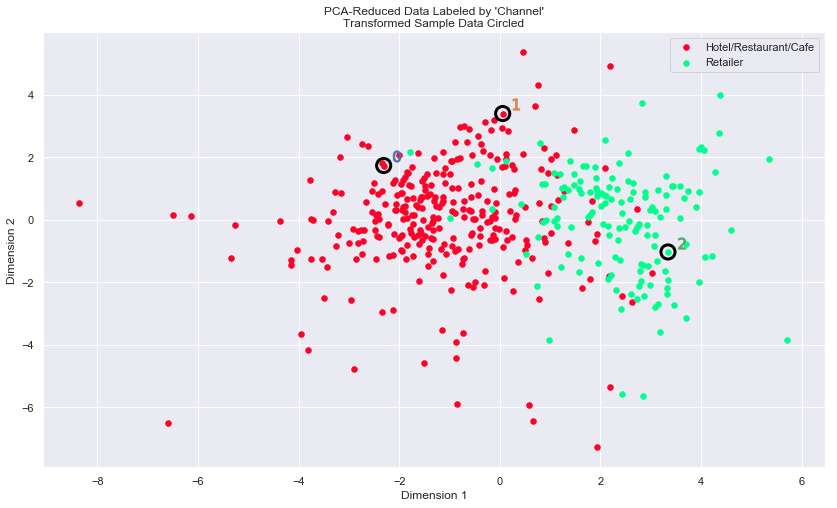

In [112]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* **How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?**

*Based on highest silhouette score, I chosen number of cluster=2 and output of the clustering algorithm are very much inline with the underlying disstribution of Hotel/Restaurant/Cafe customers to Retailer customers.* 

* **Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?**

*Yes, segment 0 can be classified as Hotel/Restaurant/Cafes and segment 1 as Retailers customers.*

* **Would you consider these classifications as consistent with your previous definition of the customer segments?**

*Yes, These classifications are consistent with previous definition of the customer segments.*

**References:**
* https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages
* https://scikit-learn.org/stable/modules/mixture.html